In [ ]:
import pandas as pd
data = pd.read_csv('/content/people.txt')
data

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [ ]:

# Create a ruleset E
def check_rule1(person):
    age = int(person['Age'])
    return 0 <= age <= 150

def check_rule2(person):
    age = int(person['Age'])
    years_married = int(person['yearsmarried'])
    return age > years_married

def check_rule3(person):
    status = person['status'].lower()
    return status in ['married', 'single', 'widowed']

def check_rule4(person):
    age = int(person['Age'])
    if age < 18:
        age_group = 'child'
    elif age < 65:
        age_group = 'adult'
    else:
        age_group = 'elderly'
    return person['agegroup'].lower() == age_group
    
E = [
    ('Rule 1: age between 0 and 150', check_rule1),
    ('Rule 2: age greater than years married', check_rule2),
    ('Rule 3: status is married, single, or widowed', check_rule3),
    ('Rule 4: age group matches age', check_rule4)
]

In [ ]:

# Check whether ruleset E is violated by the data in the file people.txt
results = {rule[0]: {'correct': 0, 'incorrect': 0} for rule in E}
violations = []
for _, person in data.iterrows():
    for rule in E:
        if rule[1](person):
            results[rule[0]]['correct'] += 1
        else:
            results[rule[0]]['incorrect'] += 1
            violations.append(person)

In [ ]:

# Summarize the results obtained
if len(violations) == 0:
    print('No violations found.')
else:
    print('The following people violated the ruleset E:')
    for violation in violations:
        print(violation)

The following people violated the ruleset E:
Age                  18
agegroup          adult
height              5.7
status          married
yearsmarried         20
Name: 2, dtype: object
Age                 221
agegroup        elderly
height              5.0
status          widowed
yearsmarried          2
Name: 3, dtype: object
Age                  34
agegroup          child
height             -7.0
status          married
yearsmarried          3
Name: 4, dtype: object


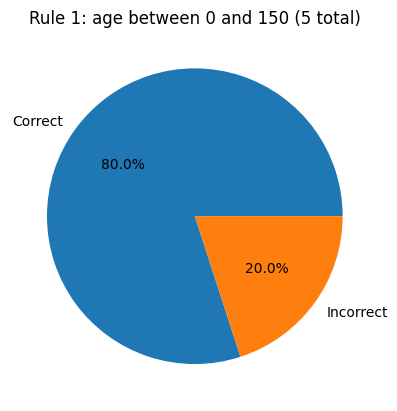

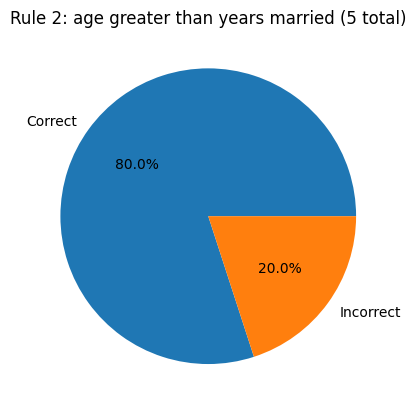

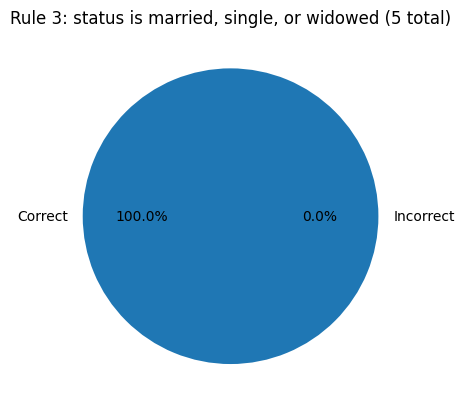

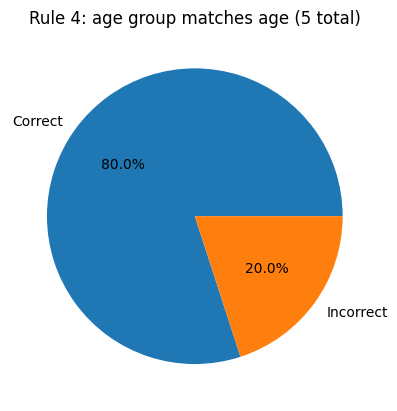

In [ ]:
# Visualize the results obtained
import matplotlib.pyplot as plt

for rule in results:
    correct = results[rule]['correct']
    incorrect = results[rule]['incorrect']
    total = correct + incorrect
    labels = ['Correct', 'Incorrect']
    sizes = [correct, incorrect]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'{rule} ({total} total)')
    plt.show()